# EDA Part I: analysing trends in rainfall, elevation and flooding data 

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

## Read in data

*train* is provided by the competition organiser. Every row corresponds to a Square which represents a geographical area in southern Malawi. Each Square has rainfall data prior to the floods as well as elevation and land type data.

In [3]:
train = pd.read_csv("Train.csv")
sub = pd.read_csv("SampleSubmission.csv")

## Some preprocessing

Generate sum and mean of rainfall over the 17 weeks prior to the floods in 2015

In [4]:
train2015 = train.drop([col for col in train.columns if '2019' in col],axis=1)
precip = [i for i in range(1,18)]
train2015.columns = ['X','Y','target','elevation']+precip+['LC_Type1_mode','id']
train2015['sum'] = train2015[precip].apply(lambda x: x.sum(),axis=1)
train2015['mean'] = train2015[precip].apply(lambda x: x.mean(),axis=1)

## Look at distribution of flooding extent

We can see that most Squares are not flooded at all, so it might be a good idea to zoom in to investigate those 100% flooded Squares

Text(0, 0.5, 'Count')

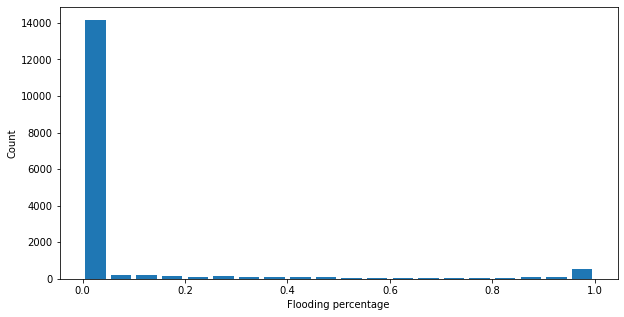

In [5]:
# distribution of flooding extent
plt.figure(figsize=(10,5))
plt.hist(train2015.target,20,range=(0,1),rwidth=0.8)
plt.xlabel("Flooding percentage")
plt.ylabel("Count")

In [6]:
# flooding extent statistics
train2015.target.describe()

count    16466.000000
mean         0.076609
std          0.228734
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target, dtype: float64

## Relationship between rainfall and flooding extent


### a) Total rainfall

From the scatter plot, we can see that total rainfall does not really have a correlation with the extent of floods

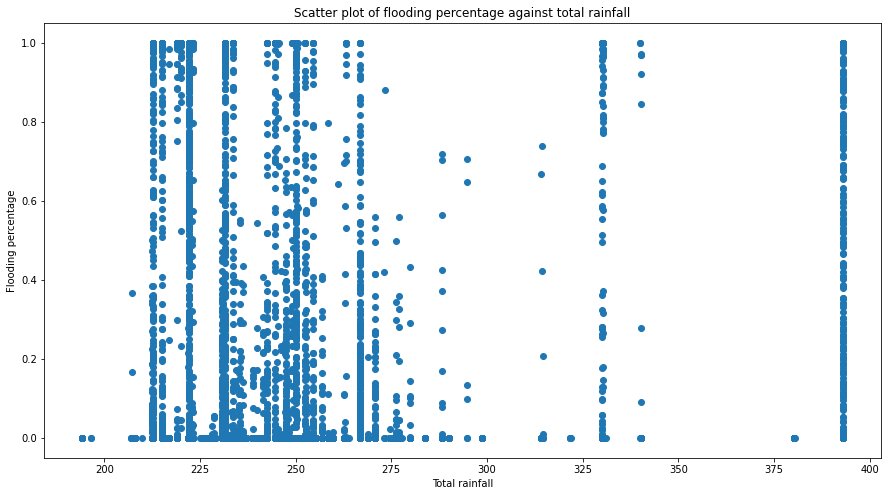

In [7]:
# see if there is any clear relationship between total rainfall and flooding extent
plt.figure(figsize=(15,8))
plt.scatter(train2015['sum'],train2015['target'])
plt.xlabel('Total rainfall')
plt.ylabel('Flooding percentage')
plt.title('Scatter plot of flooding percentage against total rainfall')
plt.show()

### b) Average rainfall

From the scatter plot, we can see that average rainfall does not really have a correlation with the extent of floods

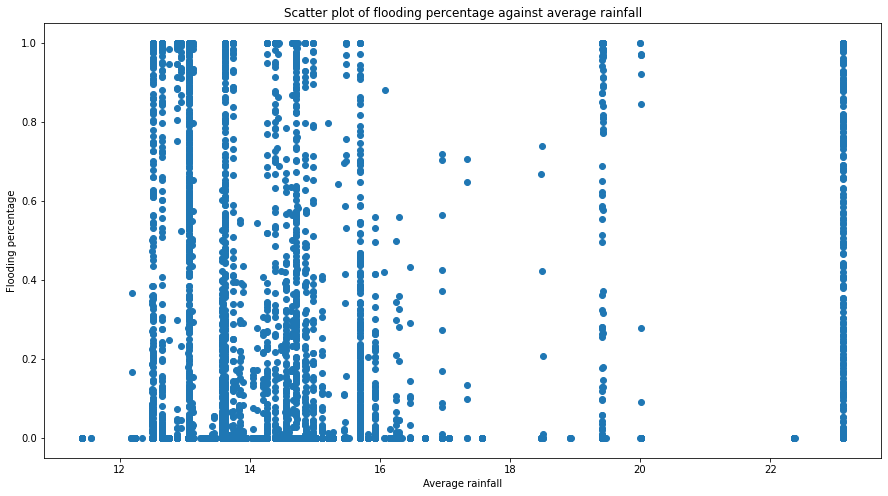

In [8]:
# see if there is any clear relationship between average rainfall and flooding extent
plt.figure(figsize=(15,8))
plt.scatter(train2015['mean'],train2015['target'])
plt.xlabel('Average rainfall')
plt.ylabel('Flooding percentage')
plt.title('Scatter plot of flooding percentage against average rainfall')
plt.show()

## Relationship between elevation and flooding extent

From the scatter plot, we can see that there is a higher percentage of low-lying areas with higher flooding percentage

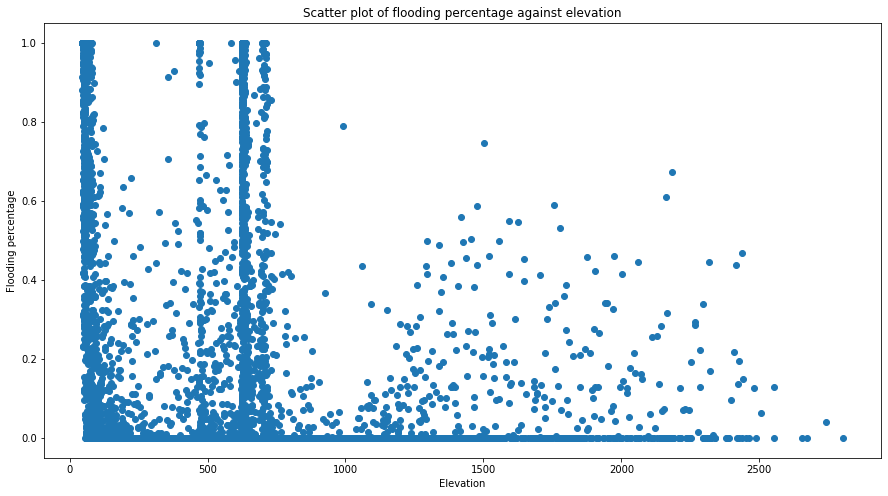

In [9]:
# see if there is any clear relationship between elevation and flooding extent
plt.figure(figsize=(15,8))
plt.scatter(train2015['elevation'],train2015['target'])
plt.xlabel('Elevation')
plt.ylabel('Flooding percentage')
plt.title('Scatter plot of flooding percentage against elevation')
plt.show()

## Looking at the extremes

Generate two new dataframes to look at the two extremes -- Squares without flood and Squares with maximal flooding

In [10]:
# look into the two extremes - 100% flooded vs 0% flooded
max_flood = train2015[train2015.target==1]
no_flood = train2015[train2015.target==0]

### a) For the 100% flooded Squares, look at the distribution of rainfall over time

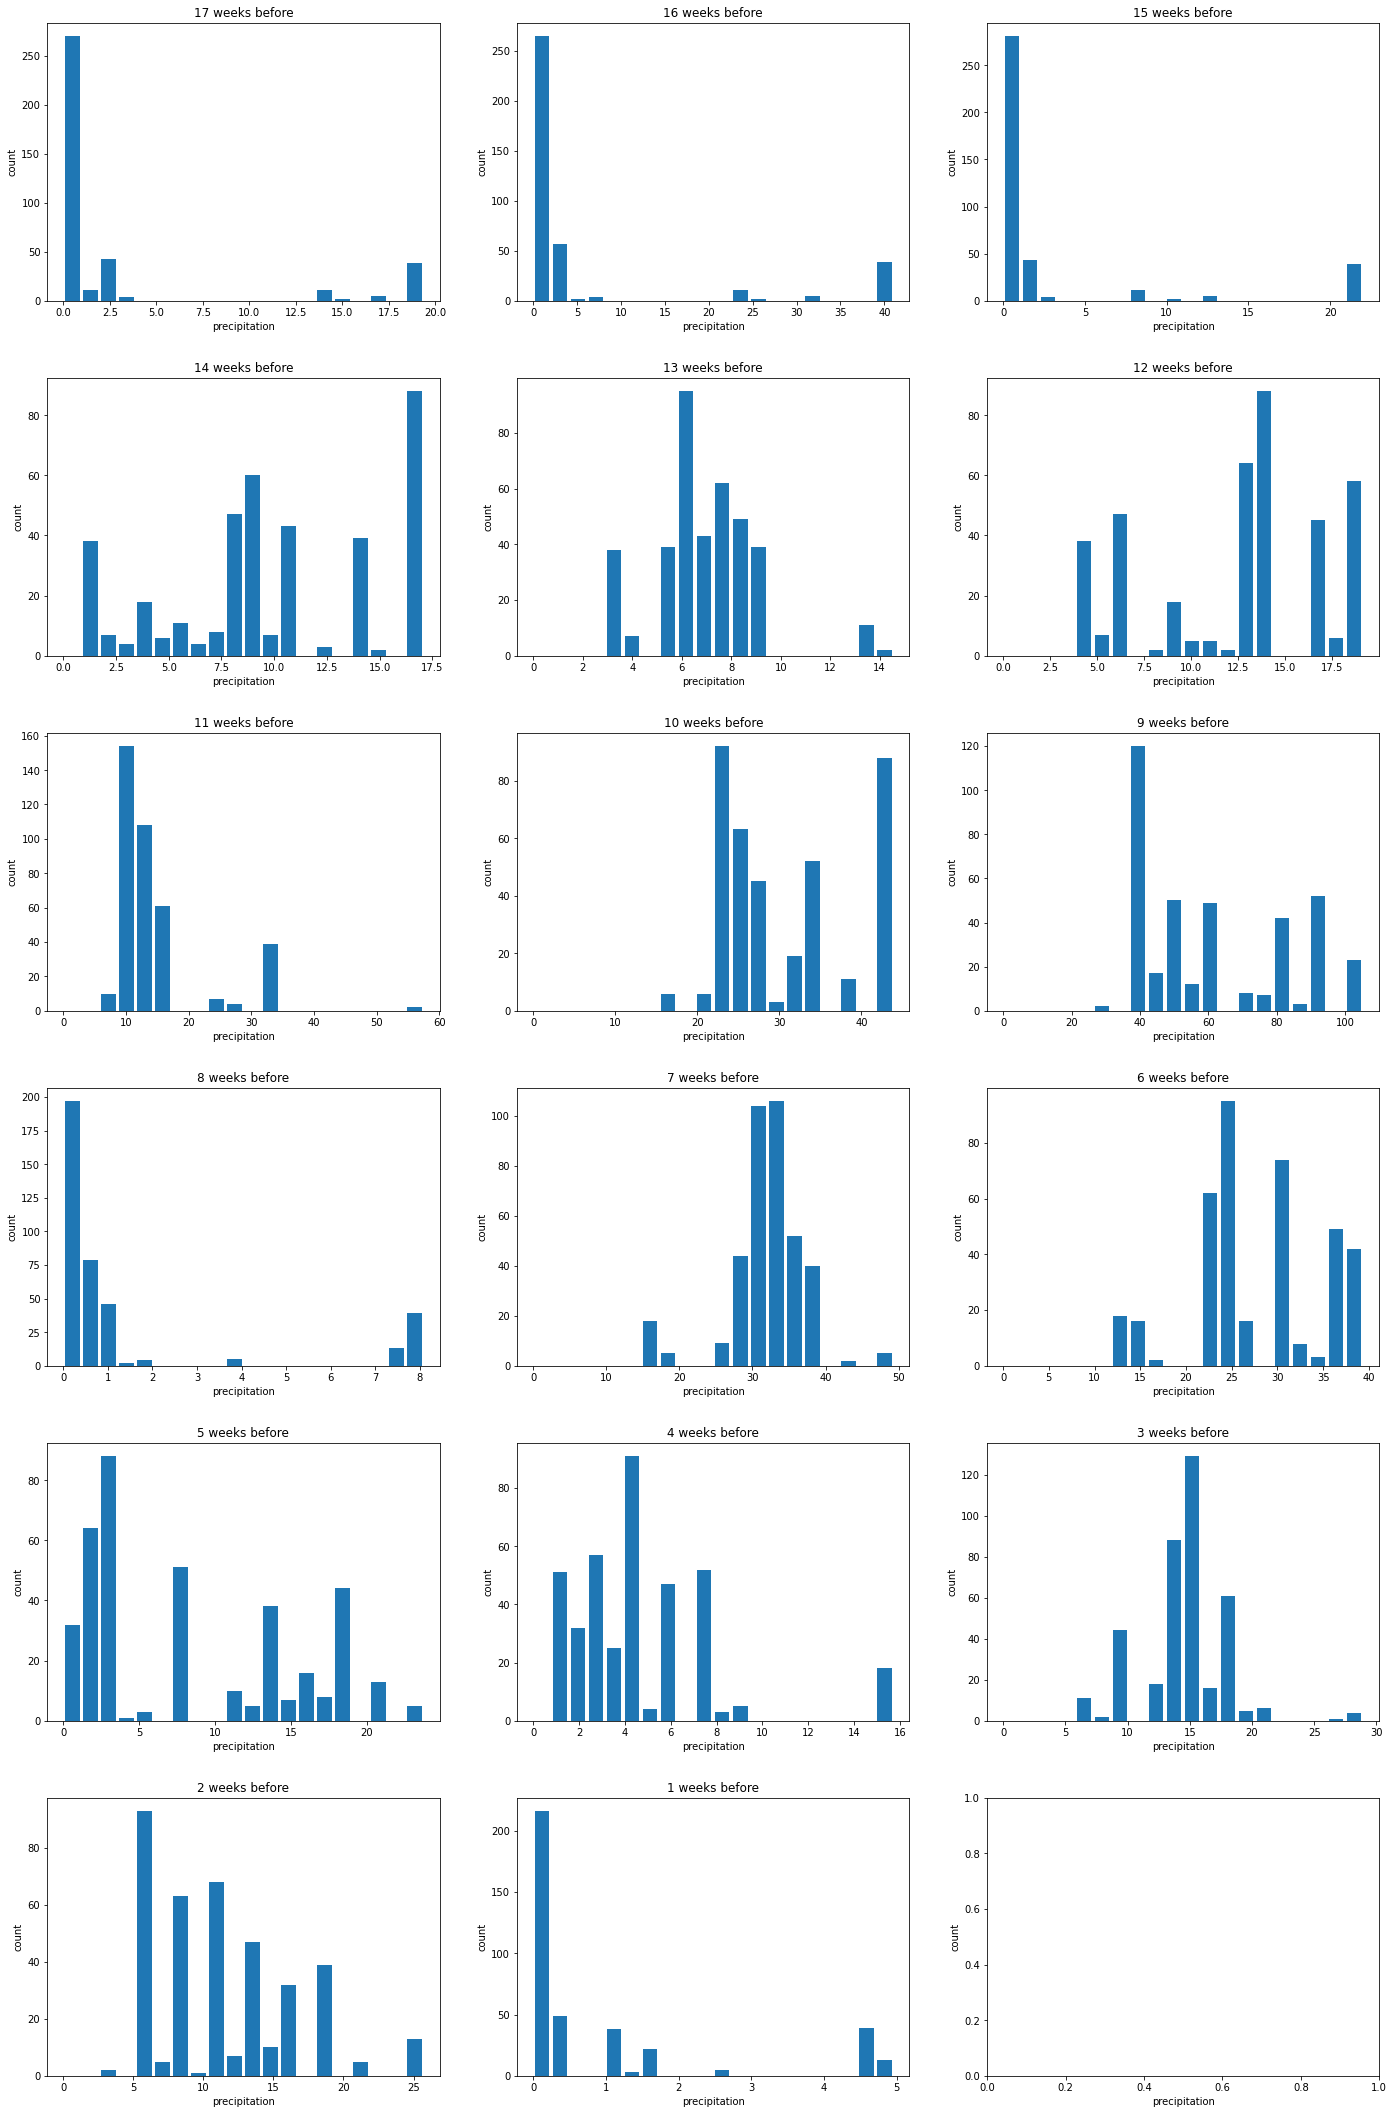

In [11]:
# for those regions with maximum flooding, look at the distribution of rainfall over the 17 weeks

fig, axs = plt.subplots(6, 3,figsize=(20,30))
for i in range(6):
    for j in range(3):
        col = i*3+j+1
        if col == 18:
            break
        axs[i][j].hist(max_flood[col],20,range=(0,max_flood[col].max()),rwidth=0.8)
        axs[i][j].set_title(f'{18-col} weeks before')
for ax in axs.flat:
    ax.set(xlabel='precipitation', ylabel='count')
fig.tight_layout(pad=3.0)

### b) For the non-flooded Squares, look at the distribution of rainfall over time

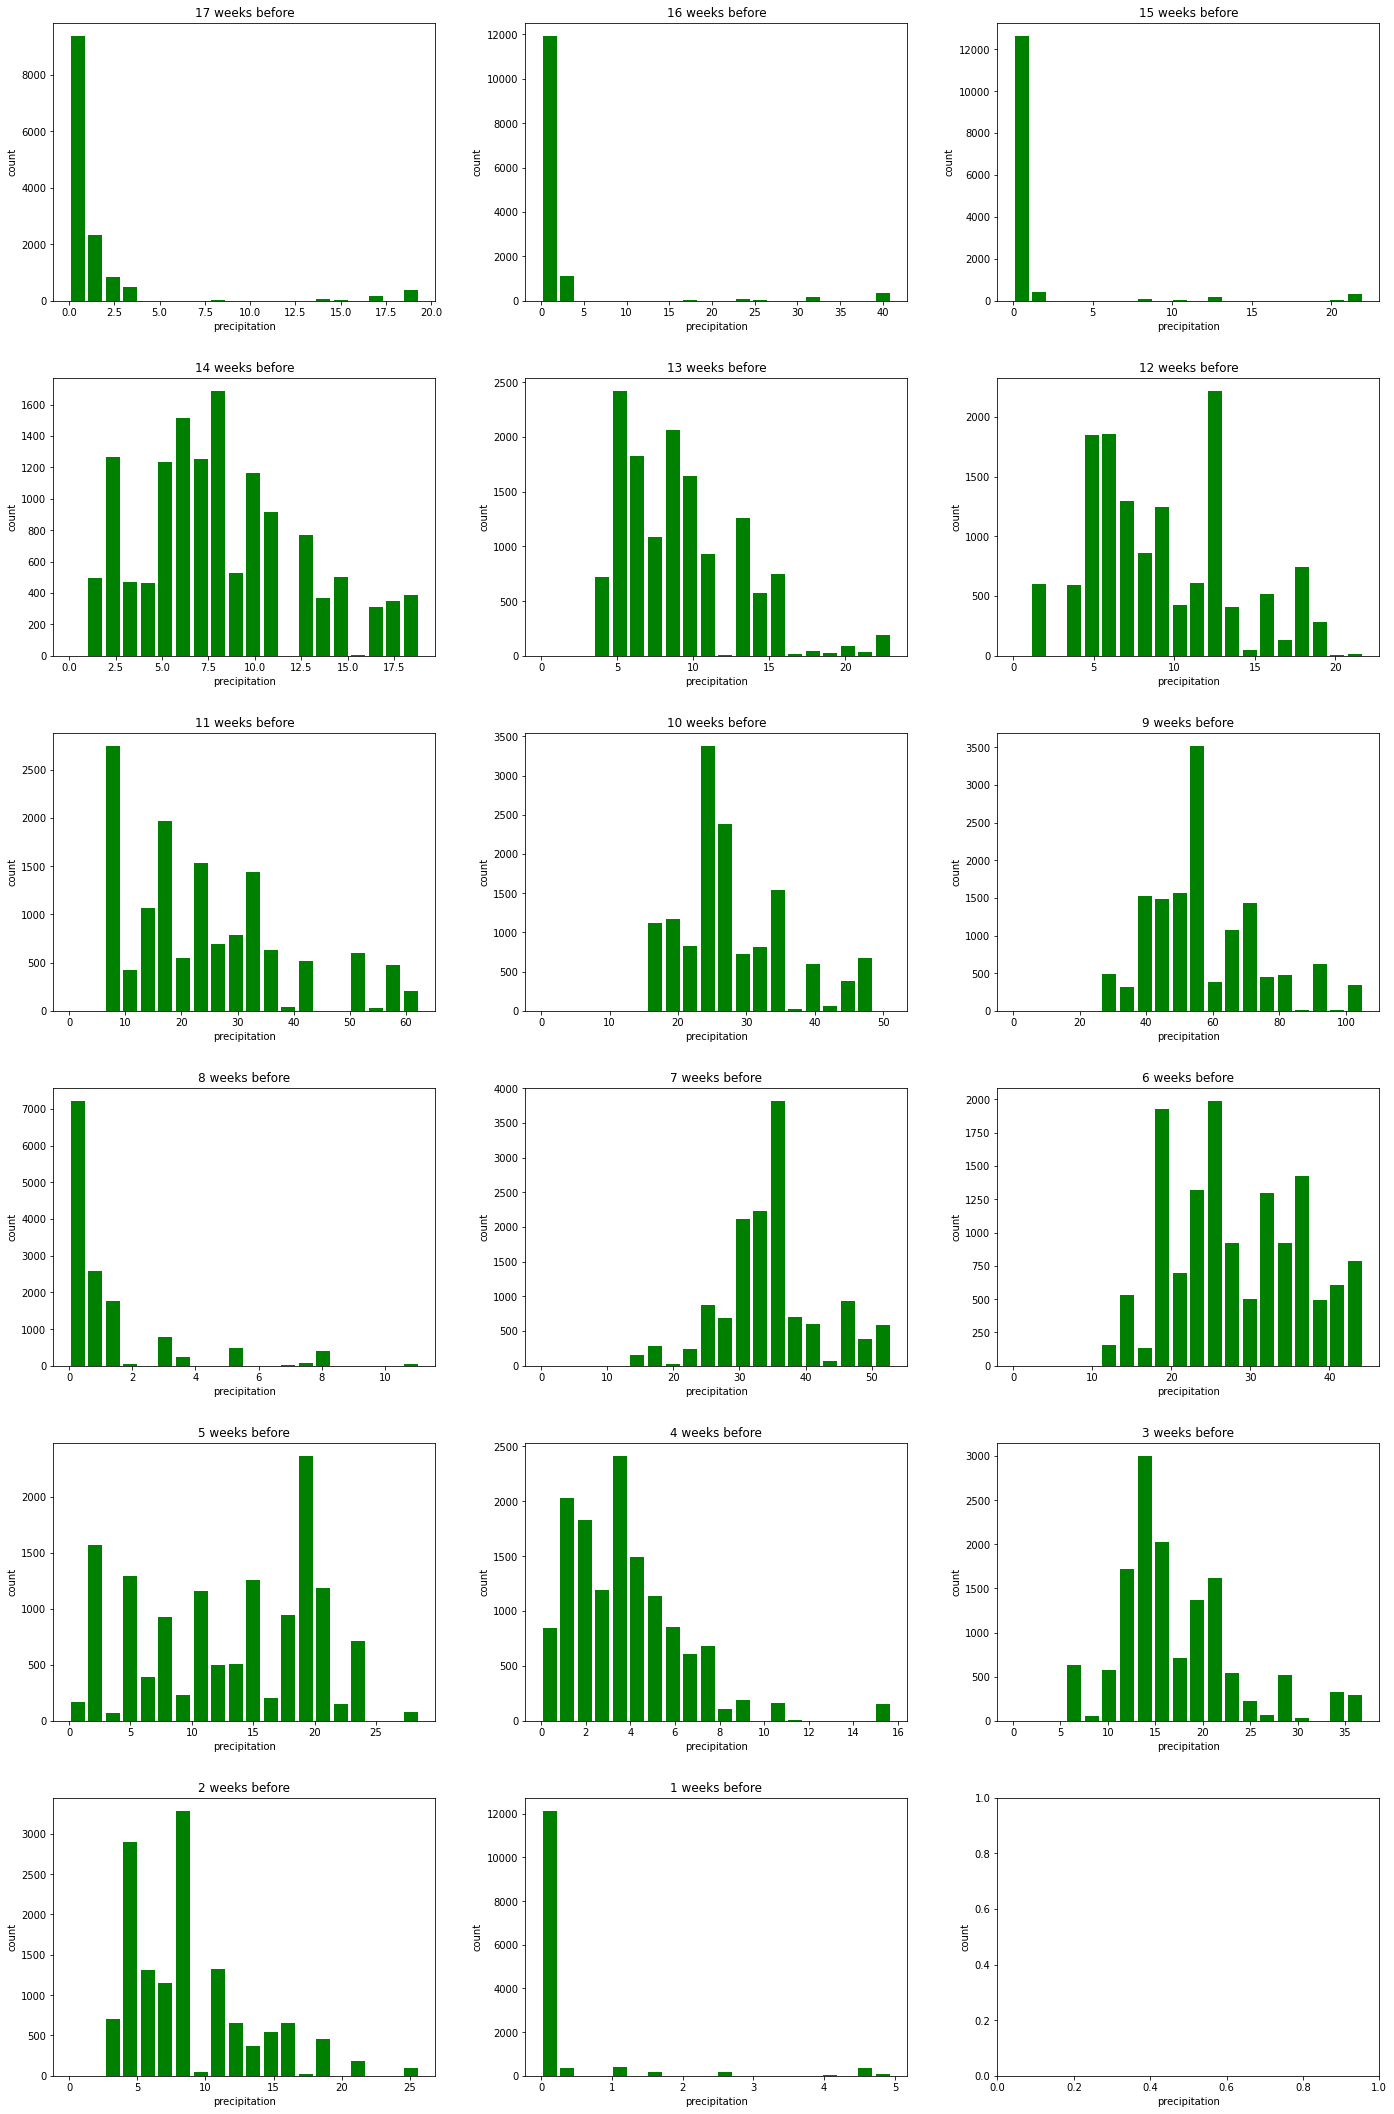

In [12]:
# for those regions with no flooding, look at the distribution of rainfall over the 17 weeks

fig, axs = plt.subplots(6, 3,figsize=(20,30))
for i in range(6):
    for j in range(3):
        col = i*3+j+1
        if col == 18:
            break
        axs[i][j].hist(no_flood[col],20,range=(0,no_flood[col].max()),rwidth=0.8,color='g')
        axs[i][j].set_title(f'{18-col} weeks before')
for ax in axs.flat:
    ax.set(xlabel='precipitation', ylabel='count')
fig.tight_layout(pad=3.0)

In [13]:
max_flood[precip].describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,2.989248,5.909510,2.876697,10.096826,6.921242,12.387781,14.099498,31.127647,61.676565,1.401733,31.786803,27.873913,8.257521,4.729685,14.691422,11.422360,0.937449
std,6.363672,13.006695,6.766892,5.068486,2.059848,4.564811,7.426513,8.239441,20.983417,2.640767,5.620915,7.284059,7.010823,3.127511,3.253151,5.166470,1.564191
min,0.000000,0.000000,0.000000,1.701402,3.580342,4.697349,8.191258,15.648154,30.449468,0.000000,14.964383,13.261280,0.459067,0.963981,6.728685,3.304466,0.000000
25%,0.000000,0.000000,0.000000,7.941822,5.905440,9.064114,8.929560,23.763822,41.461300,0.000000,30.037450,23.434456,2.749005,2.861354,13.642277,6.973991,0.000000
50%,0.000000,0.000000,0.000000,9.235926,7.064796,13.760192,12.623649,28.023123,55.813704,0.344853,32.259493,25.472472,7.391024,4.411409,14.476572,11.217845,0.000000
75%,2.118858,2.963215,1.390711,13.892502,8.631158,16.804282,14.542067,37.944918,80.470232,1.195866,35.886542,32.942617,14.092012,5.922234,15.165961,14.408881,1.232809
max,19.354969,41.023858,22.020803,17.083798,14.552823,19.133718,57.451361,43.898241,105.275891,8.081814,49.274194,39.379012,23.728058,15.715008,28.940343,25.711649,4.953321


### c) For both extremes, look at distribution of total and average rainfall

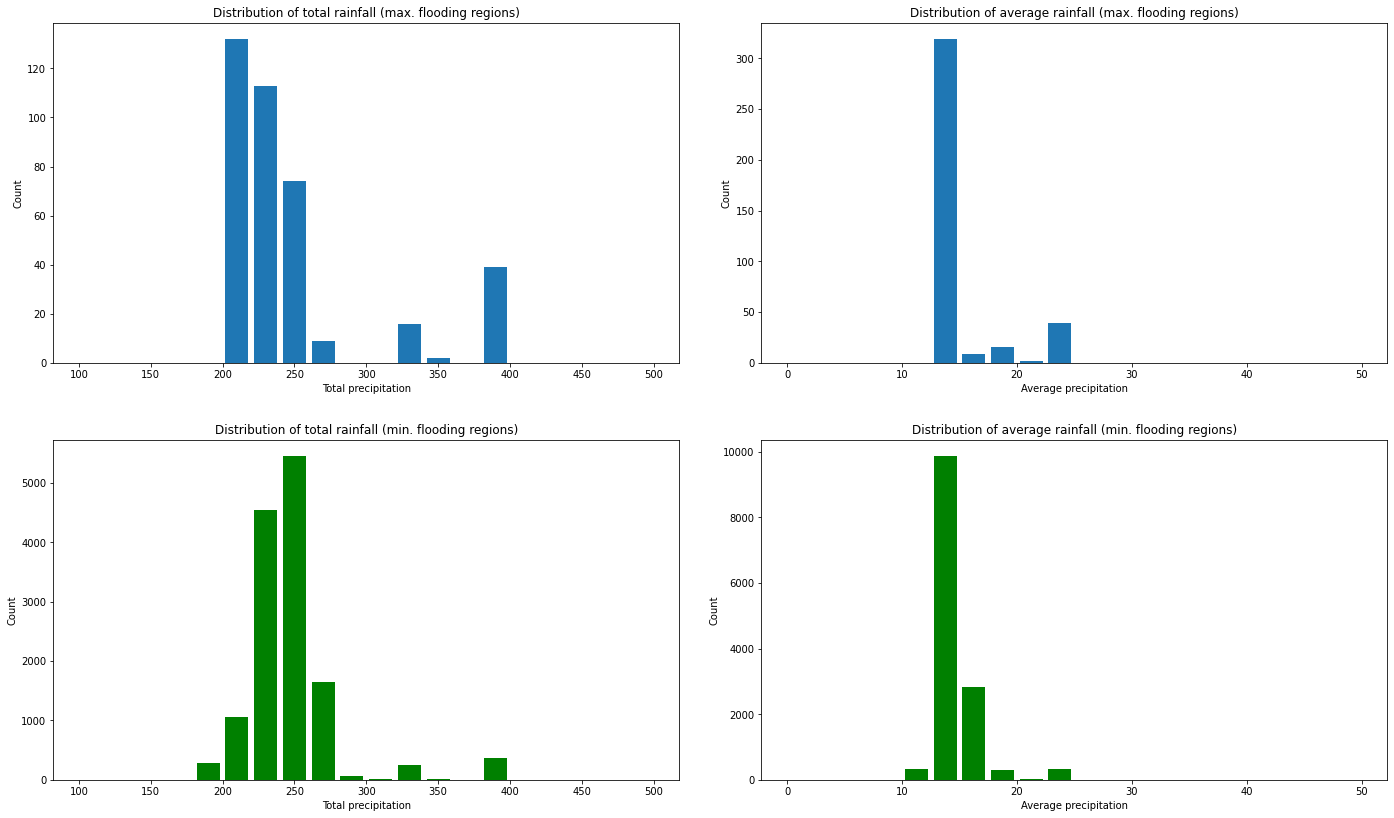

In [14]:
# for the regions with maximum and minimum flooding, look at the distribution of total and average rainfall
fig, axs = plt.subplots(2,2,figsize=(20,12))
axs[0][0].hist(max_flood['sum'].values,20,range=(100,500),rwidth=0.8)
axs[0][0].set_title('Distribution of total rainfall (max. flooding regions)')
axs[0][0].set(xlabel='Total precipitation',ylabel='Count')
axs[0][1].hist(max_flood['mean'].values,20,range=(0,50),rwidth=0.8)
axs[0][1].set_title('Distribution of average rainfall (max. flooding regions)')
axs[0][1].set(xlabel='Average precipitation',ylabel='Count')

axs[1][0].hist(no_flood['sum'].values,20,range=(100,500),rwidth=0.8,color='g')
axs[1][0].set_title('Distribution of total rainfall (min. flooding regions)')
axs[1][0].set(xlabel='Total precipitation',ylabel='Count')
axs[1][1].hist(no_flood['mean'].values,20,range=(0,50),rwidth=0.8,color='g')
axs[1][1].set_title('Distribution of average rainfall (min. flooding regions)')
axs[1][1].set(xlabel='Average precipitation',ylabel='Count')
fig.tight_layout(pad=3.0)

### d) For both extremes, look at the distribution of land types

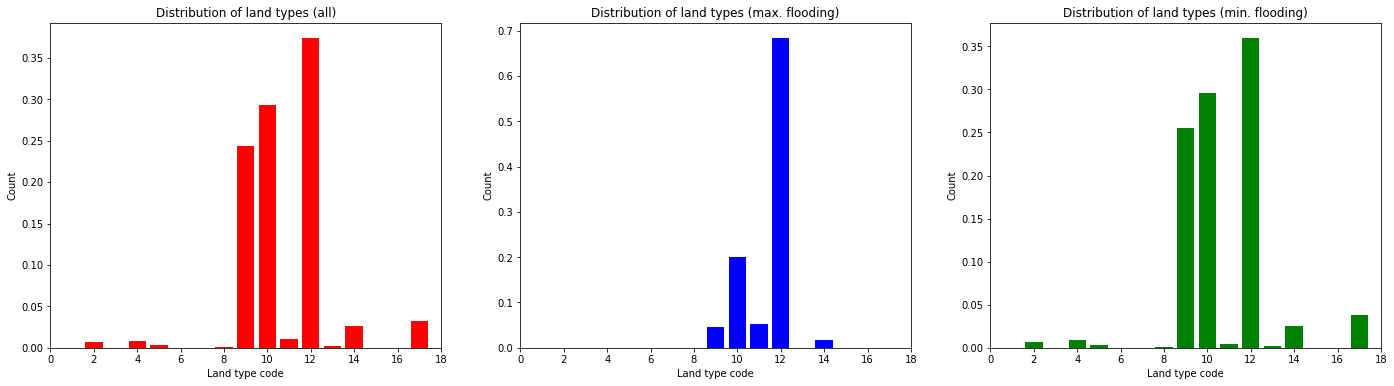

In [15]:
# for the regions with maximum and minimum flooding, look at the distribution of land types
all_land_type_dist = train2015.groupby('LC_Type1_mode').size()
max_land_type_dist = max_flood.groupby('LC_Type1_mode').size()
no_land_type_dist = no_flood.groupby('LC_Type1_mode').size()

fig, axs = plt.subplots(1,3,figsize=(20,6))
axs[0].bar(all_land_type_dist.index, all_land_type_dist.values / all_land_type_dist.values.sum(),color='r')
axs[0].set_title('Distribution of land types (all)')
axs[0].set(xlabel='Land type code',ylabel='Count')
axs[0].set_xlim(0,18)
# axs[0].set_ylim(0,6000)
axs[1].bar(max_land_type_dist.index, max_land_type_dist.values/ max_land_type_dist.values.sum(),color='b')
axs[1].set_title('Distribution of land types (max. flooding)')
axs[1].set(xlabel='Land type code',ylabel='Count')
axs[1].set_xlim(0,18)
# axs[1].set_ylim(0,6000)
axs[2].bar(no_land_type_dist.index, no_land_type_dist.values/ no_land_type_dist.values.sum(),color='g')
axs[2].set_title('Distribution of land types (min. flooding)')
axs[2].set(xlabel='Land type code',ylabel='Count')
axs[2].set_xlim(0,18)
# axs[2].set_ylim(0,6000)

fig.tight_layout(pad=3.0)

### e) For both extremes, look at the distribution of elevation

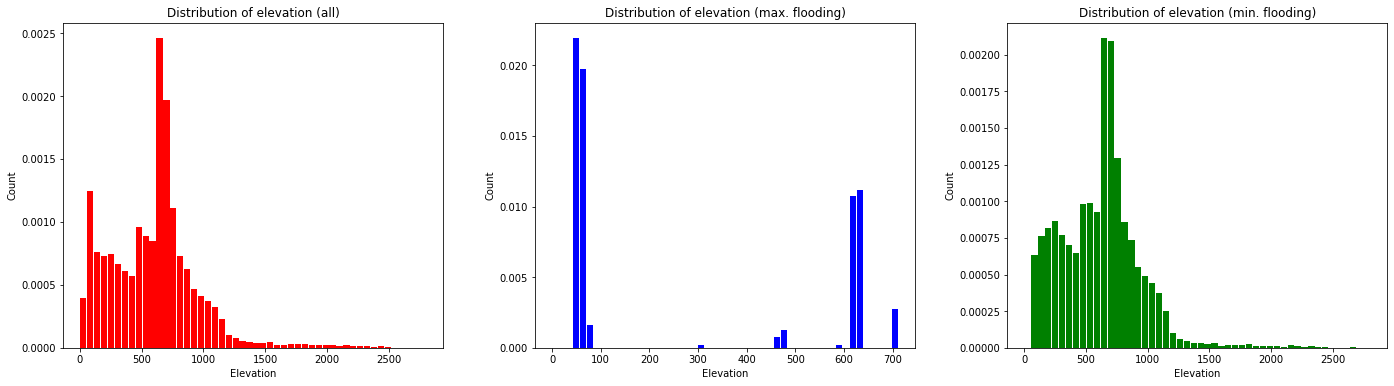

In [16]:
# for the regions with maximum and minimum flooding, look at the distribution of elevation
all_elev_dist = train2015.elevation.values
max_elev_dist = max_flood.elevation.values
no_elev_dist = no_flood.elevation.values

fig, axs = plt.subplots(1,3,figsize=(20,6))
axs[0].hist(all_elev_dist,50,range=(0,all_elev_dist.max()),color='r',rwidth=0.9,density=True)
axs[0].set_title('Distribution of elevation (all)')
axs[0].set(xlabel='Elevation',ylabel='Count')

axs[1].hist(max_elev_dist,50,range=(0,max_elev_dist.max()),color='b',rwidth=0.9,density=True)
axs[1].set_title('Distribution of elevation (max. flooding)')
axs[1].set(xlabel='Elevation',ylabel='Count')
# axs[1].set_xlim(0,18)
# # axs[1].set_ylim(0,6000)
axs[2].hist(no_elev_dist,50,range=(0,no_elev_dist.max()),color='g',rwidth=0.9,density=True)
axs[2].set_title('Distribution of elevation (min. flooding)')
axs[2].set(xlabel='Elevation',ylabel='Count')
# axs[2].set_xlim(0,18)
# axs[2].set_ylim(0,6000)

fig.tight_layout(pad=3.0)

In [17]:
# some elevation statistics
train2015_elev = train2015.elevation.describe().to_frame()
train2015_elev.columns = ['all']
elev_stats = train2015_elev.transpose()

max_flood_elev = max_flood.elevation.describe().to_frame()
max_flood_elev.columns = ['max_flood']
elev_stats = elev_stats.append(max_flood_elev.transpose())

no_flood_elev = no_flood.elevation.describe().to_frame()
no_flood_elev.columns = ['no_flood']
elev_stats = elev_stats.append(no_flood_elev.transpose())

elev_stats

,count,mean,std,min,25%,50%,75%,max
all,16466.0,592.848206,354.790357,45.541444,329.063852,623.000000,751.434813,2803.303645
max_flood,385.0,273.886689,276.701262,45.541444,54.381554,63.648220,624.739216,710.883783
no_flood,13701.0,615.811840,320.668844,56.207422,383.474427,623.107422,773.881482,2803.303645


### f) For both extremes, look at some rainfall statistics

In [18]:
# some rainfall statistics
train2015_rainfall = train2015[['mean']].describe()
train2015_rainfall.columns = ['all_mean']
rainfall_stats = train2015_rainfall.transpose()
max_flood_rainfall = max_flood[['mean']].describe()
max_flood_rainfall.columns = ['max_flood_mean']
rainfall_stats = rainfall_stats.append(max_flood_rainfall.transpose())
no_flood_rainfall = no_flood[['mean']].describe()
no_flood_rainfall.columns = ['no_flood_mean']
rainfall_stats = rainfall_stats.append(no_flood_rainfall.transpose())

train2015_rainfall = train2015[['sum']].describe()
train2015_rainfall.columns = ['all_sum']
rainfall_stats = rainfall_stats.append(train2015_rainfall.transpose())
max_flood_rainfall = max_flood[['sum']].describe()
max_flood_rainfall.columns = ['max_flood_sum']
rainfall_stats = rainfall_stats.append(max_flood_rainfall.transpose())
no_flood_rainfall = no_flood[['sum']].describe()
no_flood_rainfall.columns = ['no_flood_sum']
rainfall_stats = rainfall_stats.append(no_flood_rainfall.transpose())

rainfall_stats

,count,mean,std,min,25%,50%,75%,max
all_mean,16466.0,14.643050,2.103370,11.423449,13.589654,14.269954,15.012601,23.120462
max_flood_mean,385.0,14.657994,3.228234,12.507754,12.645939,13.622464,14.709438,23.120462
no_flood_mean,13701.0,14.590652,1.904603,11.423449,13.589654,14.269954,15.012601,23.120462
all_sum,16466.0,248.931844,35.757286,194.198633,231.024118,242.589218,255.214224,393.047856
max_flood_sum,385.0,249.185900,54.879976,212.631817,214.980970,231.581896,250.060452,393.047856
no_flood_sum,13701.0,248.041083,32.378252,194.198633,231.024118,242.589218,255.214224,393.047856


### For the 100% flooded Squares, but below average rainfall, look at land type and elevation

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Elevation')]

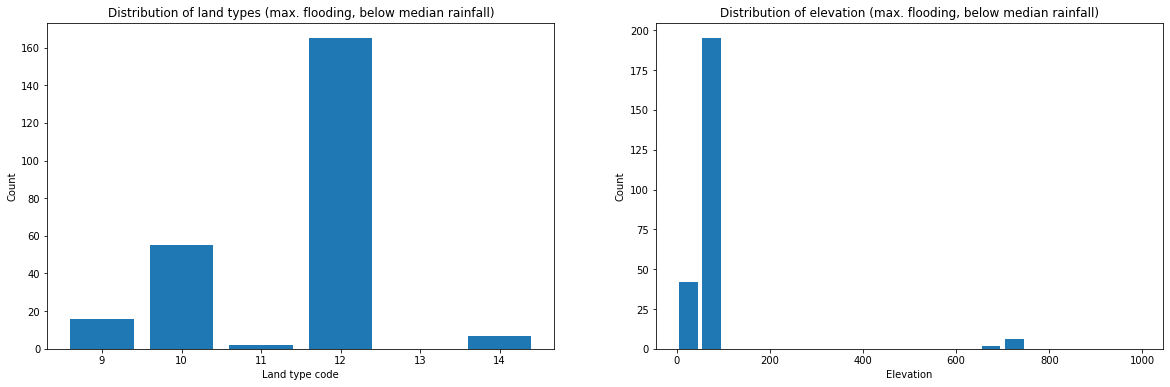

In [19]:
max_flood_low_rainfall = max_flood[(max_flood['sum'] < 242.589) & (max_flood['mean'] < 14.27)]
max_flood_low_rainfall_land = max_flood_low_rainfall.groupby('LC_Type1_mode').size()
fig, axs = plt.subplots(1,2,figsize=(20,6))
axs[0].bar(max_flood_low_rainfall_land.index, max_flood_low_rainfall_land.values)
axs[0].set_title('Distribution of land types (max. flooding, below median rainfall)')
axs[0].set(xlabel='Land type code',ylabel='Count')

axs[1].hist(max_flood_low_rainfall.elevation.values,20,range=(0,1000),rwidth=0.8)
axs[1].set_title('Distribution of elevation (max. flooding, below median rainfall)')
axs[1].set(xlabel='Elevation',ylabel='Count')

### For the non-flooded Squares, but above average rainfall, look at land type and elevation

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Elevation')]

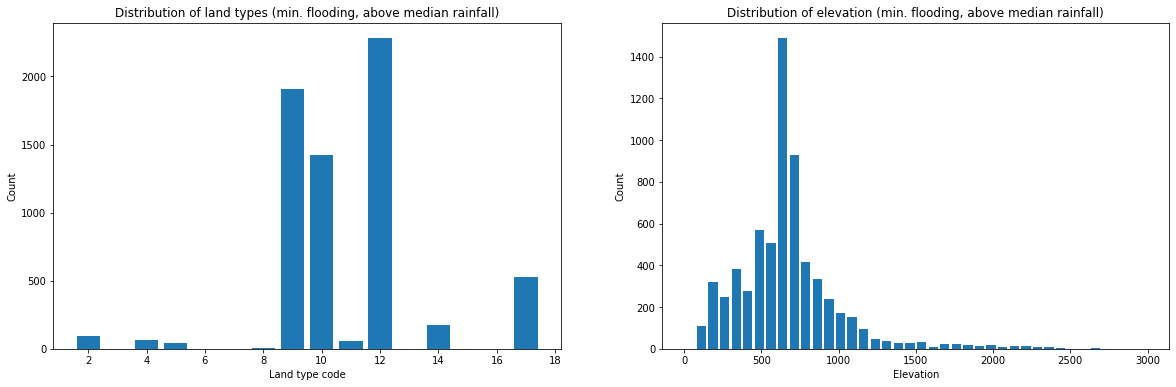

In [20]:
# for those with no flooding but above average rainfall, look at land type and elevation
no_flood_high_rainfall = no_flood[(no_flood['sum'] > 242.589) & (no_flood['mean'] > 14.27)]
no_flood_high_rainfall_land = no_flood_high_rainfall.groupby('LC_Type1_mode').size()
fig, axs = plt.subplots(1,2,figsize=(20,6))
axs[0].bar(no_flood_high_rainfall_land.index, no_flood_high_rainfall_land.values)
axs[0].set_title('Distribution of land types (min. flooding, above median rainfall)')
axs[0].set(xlabel='Land type code',ylabel='Count')

axs[1].hist(no_flood_high_rainfall.elevation.values,40,range=(0,3000),rwidth=0.8)
axs[1].set_title('Distribution of elevation (min. flooding, above median rainfall)')
axs[1].set(xlabel='Elevation',ylabel='Count')